# TP1
Nom et Matricule des étudiants : \\
Mohamad Hawchar, HAWM20039905 \\
Emile Pronovost, PROE18049606 \\


## **Préparation**

### Imports

In [ ]:
pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import re
from scipy.stats import zscore
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from pandas.plotting import scatter_matrix
import seaborn as sns  # for plotting graphs
import os # to make directories



### Collection des données

Téléchargement de data "Social Honeypot" et construire de dataframes.

In [ ]:
!wget http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
!unzip social_honeypot_icwsm_2011.zip

--2022-03-06 19:45:06--  http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Resolving infolab.tamu.edu (infolab.tamu.edu)... 45.55.217.29
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip [following]
--2022-03-06 19:45:06--  https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263659672 (251M) [application/zip]
Saving to: ‘social_honeypot_icwsm_2011.zip’

social_honeypot_icw 100%[===================>] 251.45M  40.3MB/s    in 6.9s    

2022-03-06 19:45:14 (36.6 MB/s) - ‘social_honeypot_icwsm_2011.zip’ saved [263659672/263659672]

Archive:  social_honeypot_icwsm_2011.zip
   creating: social_honeypot_icwsm_2011/
  inflating: social_honeypot_icwsm_2011/content_polluters.txt  
 

In [ ]:
#Creating data frames out of the 6 files.
dfContentPolluters = pd.read_csv('social_honeypot_icwsm_2011/content_polluters.txt',sep='\t', names=
  ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers","NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
  parse_dates=["CreatedAt","CollectedAt"],index_col=0)
#Using converters to convert the SeriersOfNumberOfFollowing column to a series of Integers by spoliting the String wit ','
dfContentPollutersFollowings = pd.read_csv('social_honeypot_icwsm_2011/content_polluters_followings.txt',sep='\t', names=
  ["UserID","SeriesOfNumberOfFollowings"],converters={"SeriesOfNumberOfFollowings":(lambda string:pd.Series(string.split(',')).astype(int)) },index_col=0)

dfContentPollutersTweets = pd.read_csv('social_honeypot_icwsm_2011/content_polluters_tweets.txt',sep='\t', names=
  ["UserID","TweetID","Tweet","CreatedAt"], parse_dates=["CreatedAt"],index_col=0)

dfLegitimateUsers = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users.txt',sep='\t', names=
  ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers","NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
  parse_dates=["CreatedAt","CollectedAt"],index_col=0)
#Using converters to convert the SeriersOfNumberOfFollowing column to a series of Integers
dfLegitimateUsersFollowings = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users_followings.txt',sep='\t', names=
  ["UserID","SeriesOfNumberOfFollowings"],converters={"SeriesOfNumberOfFollowings":(lambda string:pd.Series(string.split(',')).astype(int))},index_col=0)

dfLegitimateUsersTweets = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users_tweets.txt',sep='\t', names=
  ["UserID","TweetID","Tweet","CreatedAt"], parse_dates=["CreatedAt"],index_col=0)

In [ ]:
# Creation of files to stock the output graphes.
pd.set_option('display.max_rows', 4)
os.makedirs(os.path.dirname('/content/Pretreatment_Graphes/'), exist_ok=True)
os.makedirs(os.path.dirname('/content/Tache1_Graphes/'), exist_ok=True)
os.makedirs(os.path.dirname('/content/Tache2_Graphes/information_gain_Graphes/'), exist_ok=True)
os.makedirs(os.path.dirname('/content/Tache2_Graphes/Chi2_Graphes/'), exist_ok=True)

## calcul des attributs

### 1 - The length of the screen name

In [ ]:
# Get the LengthofScreenName feature's dataframe
def lengthName(data_frame) :
  df = pd.DataFrame({"LengthOfScreenName":data_frame["LengthOfScreenName"]})
  return df
#display(lengthName(dfContentPolluters))

### 2 - The length of the description

In [ ]:
# Get the LengthOfDescription feature's dataframe
def lengthDescription(data_frame) :
  df = pd.DataFrame({"LengthOfDescription":data_frame["LengthOfDescriptionInUserProfile"]})
  return df

### 3 - The	longevity	of	the	account

In [ ]:
# Get the LongevityOfAccount feature's dataframe
## for each data row, substract the "CollectedAt" of "CreatedAt" dates and divide by np.timedelta64(1, 'D') to get the difference by days
def AccountLongevity(data_frame) :
  df=pd.DataFrame({"LongevityOfAccount": (data_frame["CollectedAt"]-data_frame["CreatedAt"])/np.timedelta64(1, 'D')})
  return df
#display(AccountLongevity(dfContentPolluters))

### 4 - Numbers of followings

In [ ]:
# Get the NumberOfFollowings feature's dataframe
def nbrOfFollowings(data_frame) :
  df = pd.DataFrame({"NumberOfFollowings":data_frame["NumberOfFollowings"]})
  return df

### 5 - Numbers of followers

In [ ]:
# Get the NumberOfFollowers feature's dataframe
def nbrOfFollowers(data_frame) :
  df = pd.DataFrame({"NumberOfFollowers":data_frame["NumberOfFollowers"]})
  return df

### 6 - The standard	deviation	of unique	numerical	IDs	of following

In [ ]:
# Get the STDOfUniqueFollowers feature's dataframe
def followingsSTD(data_frame) :
  df = pd.DataFrame({"STDOfUniqueFollowers":data_frame["SeriesOfNumberOfFollowings"].apply(lambda row : row.std())})
  return df

### 7 - Followings / Followers

In [ ]:
# Get the RatioFollowings/Followers feature's dataframe
# if the amount of followers is 0, the result will be 0 to avoid infinite numbers.

def rationFollowingstoFollowers(data_frame) :
  df = pd.DataFrame({"RatioFollowingsToFollowers": (data_frame["NumberOfFollowings"] / data_frame["NumberOfFollowers"]) })
  return df
#display(rationFollowingstoFollowers(dfContentPolluters))

### 8 - Number of tweets

In [ ]:
# Get the NumberOfTweets feature's dataframe
def nbrOfTweets(data_frame) :
  df = pd.DataFrame({"NumberOfTweets": data_frame["NumberOfTweets"] })
  return df
#display(nbrOfTweets(dfContentPolluters))

### 9 - Number of tweets / day

In [ ]:
# Get the NumberOfTweetsPerDay feature's dataframe
def numberOfTweetsPerActiveDay(data_frame) :
  dftemp = pd.DataFrame({"CreatedAt":data_frame["CreatedAt"].dt.date}) # transform date to formt year-month-day
  dftemp=dftemp.groupby(["UserID","CreatedAt"]).size() # get the size of each group, which will get us the total of tweets for the user
  dftemp=dftemp.groupby(["UserID"]).mean().reset_index(name='0') # calculate the mean
  df = pd.DataFrame({"UserID":dftemp["UserID"],"NumberOfTweetsPerDay":dftemp["0"]}) # construct a new df
  df=df.set_index("UserID")
  return df
#display(numberOfTweetsPerActiveDay(dfContentPollutersTweets))

### 10 - |Tweets| / longevity

In [ ]:
# Get the RatioTweets/Account feature's dataframe
def avgOfTweetsPerAccountsLifetime(data_frame) :
  df = pd.DataFrame({"RatioTweetsToAccount": nbrOfTweets(data_frame)["NumberOfTweets"] / AccountLongevity(data_frame)["LongevityOfAccount"] })
  return df
#display(avgOfTweetsPerAccountsLifetime(dfContentPolluters))

### 11 - |Tweets with URL|  /  |Tweets|

In [ ]:
# Get the URLRatioTweet feature's dataframe
def containURL(tweet):
    count = len(re.findall('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', str(tweet)))
    return 0 if count == 0 else 1

def URLRatioTweet(data_frame):
  dftemp = pd.DataFrame({"URLRatioTweet":data_frame["Tweet"].apply(containURL)})
  df0 = dftemp.groupby(["UserID"]).mean()
  return df0
#display(URLRatioTweet(dfContentPollutersTweets))

### 12 - Average URLs / Tweet

In [ ]:
# Get the averageURLPerTweet feature's dataframe
# all the strings that start with http or https, followed by ://
def URLcount(tweet):
  return len(re.findall('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', str(tweet)))

def averageURL(data_frame) :
  dftemp=pd.DataFrame({"averageURLPerTweet": data_frame["Tweet"].apply(URLcount)})
  df = dftemp.groupby(["UserID"]).mean()
  return df
#display(averageURL(dfContentPollutersTweets))

### 13 - Average mentions / Tweet

In [ ]:
# Get the averageMentionsPerTweet feature's dataframe
def Mentionscount(tweet):
  return len(re.findall('(^|[^@\w])@(\w{1,15})', str(tweet)))

def averageMentions(data_frame) :
  dftemp=pd.DataFrame({"averageMentionsPerTweet": data_frame["Tweet"].apply(Mentionscount)})
  df = dftemp.groupby(["UserID"]).mean()
  return df
#display(averageMentions(dfContentPollutersTweets))


### 14 - Average time between 2 consecutives tweets

In [ ]:
# Get the NumberOfFollowings feature's dataframe
def calculateMeanofTimedifference(group):
  temp = [(left - right).total_seconds() / 60 for right, left in zip(group, group[1:])]
  return 0 if len(temp) == 0 else sum(temp) / len(temp)

def avgTimeBetween2Tweets(data_frame):
  df = pd.DataFrame({"CreatedAt":pd.to_datetime(data_frame["CreatedAt"])}).sort_values(by=['UserID','CreatedAt'])
  df1 = df.sort_values(by=["CreatedAt"],ascending=True)
  df1 = df.groupby(["UserID"]).CreatedAt.apply(list) #convert the second columnt "createdAt" to a list of dates.
  df2 = df1.apply(calculateMeanofTimedifference) # pass the list to a function that calculate the average between 2 consecutive tweets
  df3 = pd.DataFrame({"avgTimeBetween2Tweets":df2})
  return df3

#display(avgTimeBetween2Tweets(dfContentPollutersTweets))

### 15 - Max time between 2 consecutives tweets

In [ ]:
# Get the NumberOfFollowings feature's dataframe
def calculateMaxofTimedifference(group):
  temp = [(left - right).total_seconds() / 60 for right, left in zip(group, group[1:])]
  return max(temp, default=0)

def maxTimeBetween2Tweets(data_frame):
  df = pd.DataFrame({"CreatedAt":pd.to_datetime(data_frame["CreatedAt"])}).sort_values(by=['UserID','CreatedAt'])
  df1 = df.groupby(["UserID"]).CreatedAt.apply(list) #convert the second columnt "createdAt" to a list of dates.
  df2 = df1.apply(calculateMaxofTimedifference) # pass the list to a function that calculate the average between 2 consecutive tweets
  df3 = pd.DataFrame({"maxTimeBetween2Tweets":df2})
  return df3

#display(maxTimeBetween2Tweets(dfLegitimateUsersTweets))

## Pretretment


### Fusion et calssement

#### Concaténation des dataFrames

In [ ]:
featuresPolluters=pd.concat([lengthName(dfContentPolluters),lengthDescription(dfContentPolluters),
                        AccountLongevity(dfContentPolluters),nbrOfFollowings(dfContentPolluters),nbrOfFollowers(dfContentPolluters),
                        followingsSTD(dfContentPollutersFollowings),rationFollowingstoFollowers(dfContentPolluters),
                        nbrOfTweets(dfContentPolluters),avgOfTweetsPerAccountsLifetime(dfContentPolluters),
                        numberOfTweetsPerActiveDay(dfContentPollutersTweets),URLRatioTweet(dfContentPollutersTweets),
                        averageURL(dfContentPollutersTweets),averageMentions(dfContentPollutersTweets),
                        avgTimeBetween2Tweets(dfContentPollutersTweets),maxTimeBetween2Tweets(dfContentPollutersTweets)],axis=1)

featuresLegitimate=pd.concat([lengthName(dfLegitimateUsers),lengthDescription(dfLegitimateUsers),
                        AccountLongevity(dfLegitimateUsers),nbrOfFollowings(dfLegitimateUsers),nbrOfFollowers(dfLegitimateUsers),
                        followingsSTD(dfLegitimateUsersFollowings),rationFollowingstoFollowers(dfLegitimateUsers),
                        nbrOfTweets(dfLegitimateUsers),avgOfTweetsPerAccountsLifetime(dfLegitimateUsers),
                        numberOfTweetsPerActiveDay(dfLegitimateUsersTweets),URLRatioTweet(dfLegitimateUsersTweets),
                        averageURL(dfLegitimateUsersTweets),averageMentions(dfLegitimateUsersTweets),
                        avgTimeBetween2Tweets(dfLegitimateUsersTweets),maxTimeBetween2Tweets(dfLegitimateUsersTweets)],axis=1)



#### Ajout de classe 1 pour "polluters" et 0 "legitimate"

In [ ]:
featuresPolluters.insert(0,"Class",1)
featuresLegitimate.insert(0,"Class",0)


#display(featuresPolluters)
#display(featuresLegitimate)

In [ ]:
#display(featuresPolluters[featuresPolluters["maxTimeBetween2Tweets"].isna() == True])

#### Fusion des 2 dataFrames

In [ ]:
dataSet_notCleaned=pd.concat([featuresLegitimate,featuresPolluters])# we can see some inf and NaN values that are caused by missing data

#display((dataSet_notCleaned[dataSet_notCleaned['maxTimeBetween2Tweets'].isna() == True]))


### Netoyage

#### Suppression les données en double.

In [ ]:
def duplicateRows(dataset):
  return dataset.drop_duplicates()

#### Remplacement des valeurs manquantes

In [ ]:
def missingValues(dataset):
  valuesReplaced = dataset.replace([np.inf,-np.inf],np.nan)
  valuesReplaced.fillna(0,inplace=True)
  return valuesReplaced

#### Approche z-score

In [ ]:
def zscores(dataset):
  df=dataset.drop(["Class"],axis=1)
  df=df.apply(zscore)
  df["Class"]=dataset["Class"]
  return df

#### Application des fonction de netoyage


In [ ]:
dataSet_noDuplicates=duplicateRows(dataSet_notCleaned) # no duplicates
dataSet_noMissingValues=missingValues(dataSet_noDuplicates) # the 0 number of followers cause the ratio Following/Followers to be inf, so we change these values to 0. In addtion few users doesn't have any tweets in the tweets files, which give Nan values for the calculation performed on the tweets, we switch these with 0s as well.
dataSet_noMissingValues.sort_index(inplace = True)
#display(dataSet_noMissingValues)

#### Graphes


RatioFollowingsToFollowers    0.207234
NumberOfTweets                0.000000
                                ...   
avgTimeBetween2Tweets         3.862744
maxTimeBetween2Tweets         3.862744
Length: 9, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


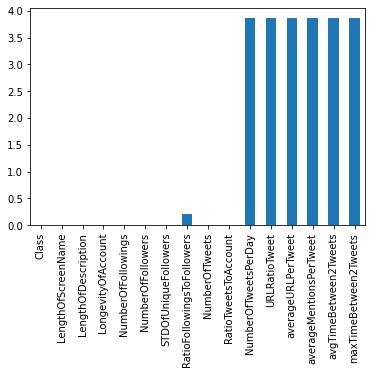

In [ ]:

def missingValuesRatio(string):# Calcule le ratio des valeurs NaN pour chaque colonne
   return  len(dataSet_notCleaned[dataSet_notCleaned[string].isna() == True] )/len(dataSet_notCleaned) * 100
#dataset[dataset.isna().all(axis=1)].count(axis=0)/len(dataset.index)
s = pd.Series()
dic = {}
tempd = (dataSet_notCleaned)
for x in tempd.columns:
  dic[x] = missingValuesRatio(x)
s = pd.Series(dic)
print(s[7:])
s.plot.bar()



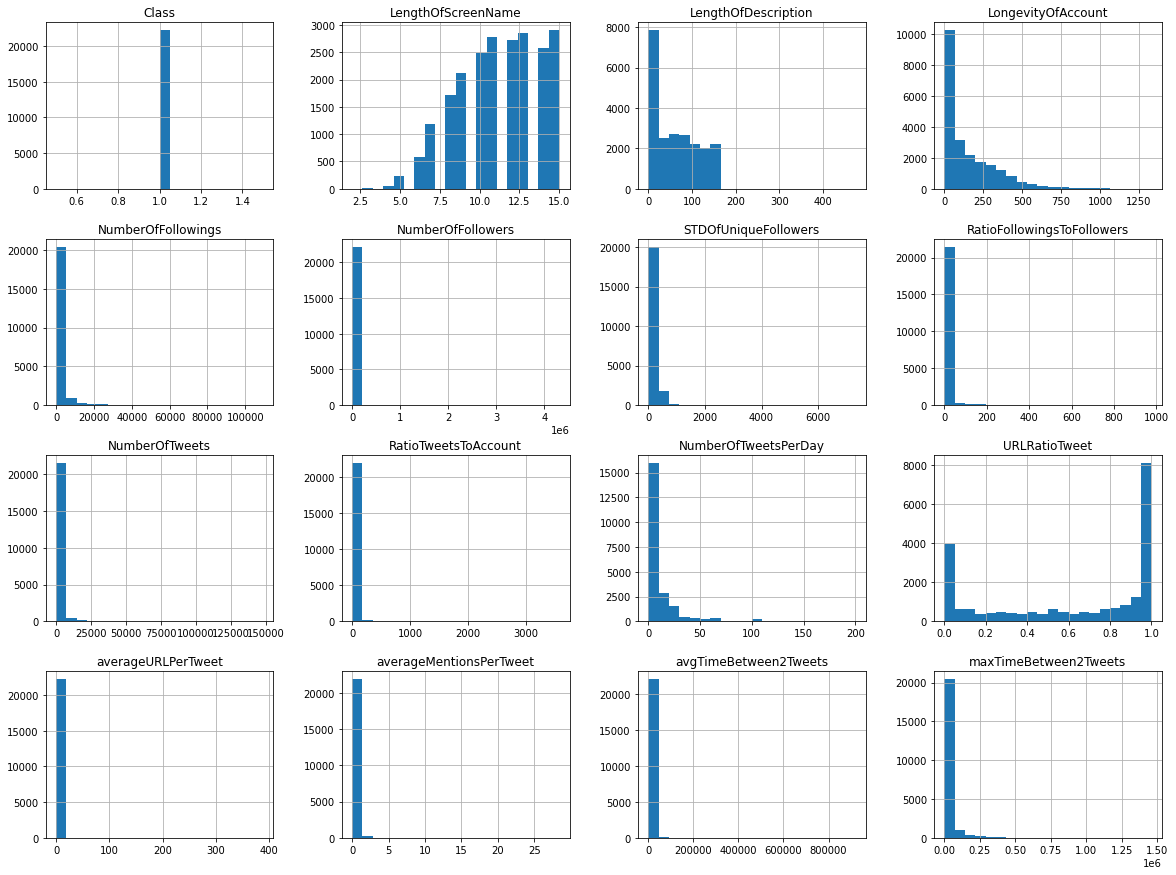

In [ ]:
# Construction d'un histogramme pour chaque attribut pour le class Polluter
dataSet_noMissingValues[dataSet_noMissingValues['Class'] == 1].hist(bins=20, figsize=(20,15))
plt.savefig('/content/Pretreatment_Graphes/Histogrammes_features_Polluters.png')
plt.show()

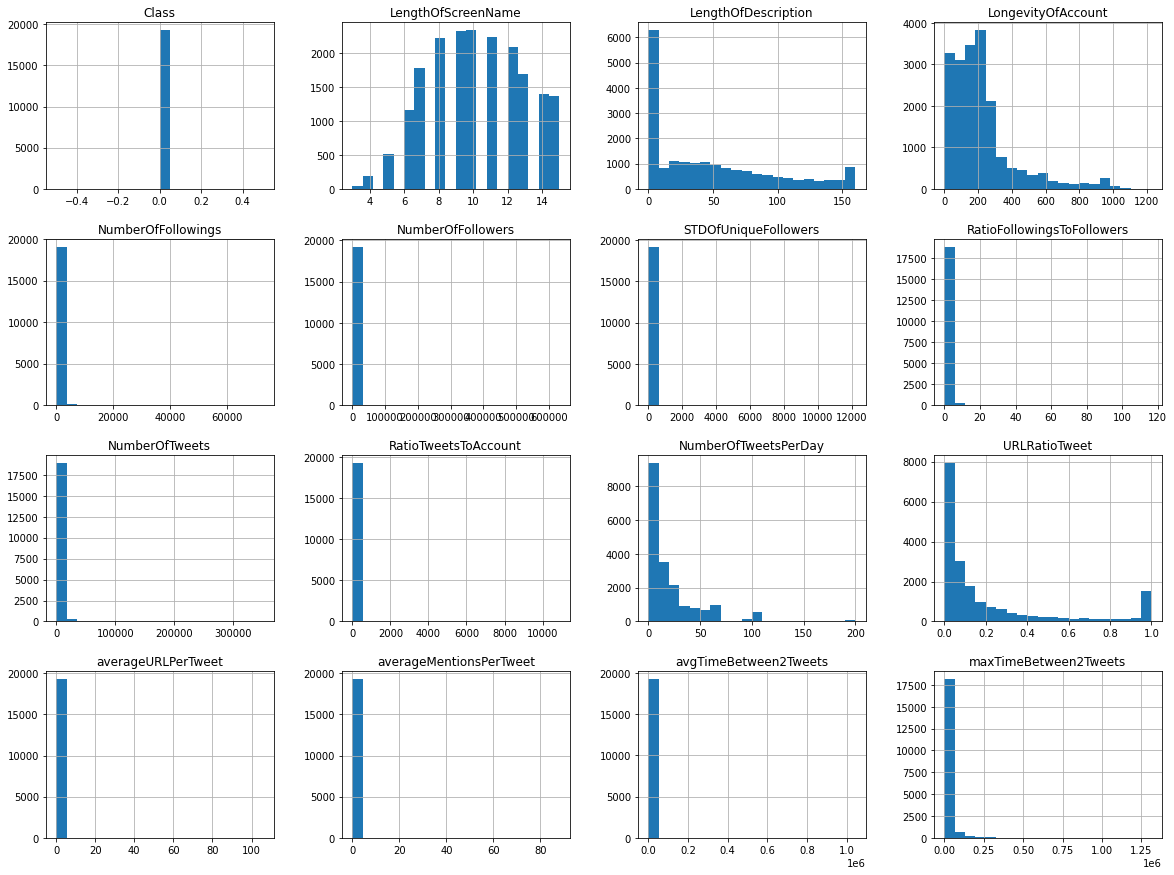

In [ ]:
# Construction d'un histogramme pour chaque attribut pour le class Legitimate
dataSet_noMissingValues[dataSet_noMissingValues['Class'] == 0].hist(bins=20, figsize=(20,15)) # we can see a clear difference in the values between the two classes.
plt.savefig('/content/Pretreatment_Graphes/Histogrammes_features_Legitimates.png')
plt.show()


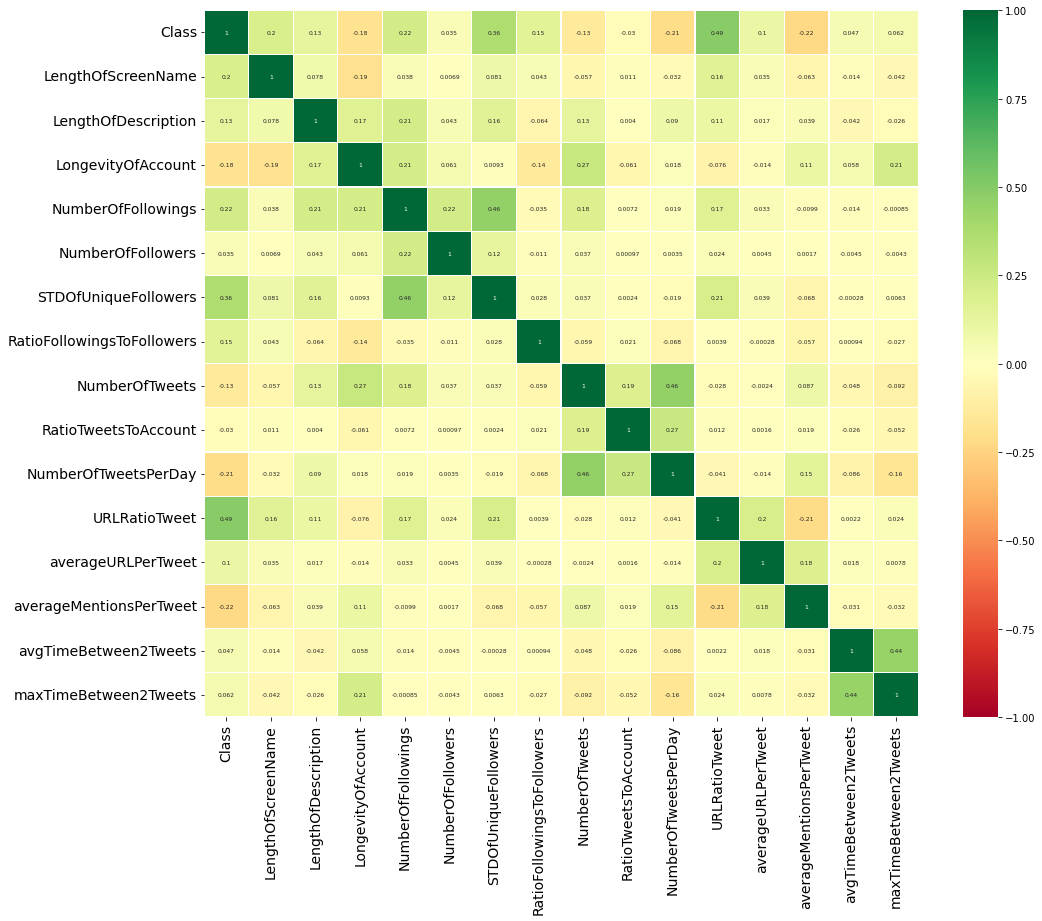

In [ ]:
# Correlation Matrix Plot
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(dataSet_noMissingValues.corr(), vmin=-1, vmax=1,cmap='RdYlGn')
#fig.colorbar(cax)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.show()

sns.heatmap(dataSet_noMissingValues.corr(),vmin=-1, vmax=1,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':6})
fig=plt.gcf()
fig.set_size_inches(16,13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/Pretreatment_Graphes/HeatMap.png')
#plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


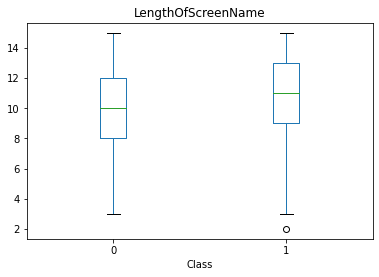

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


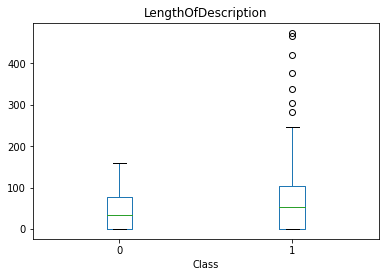

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


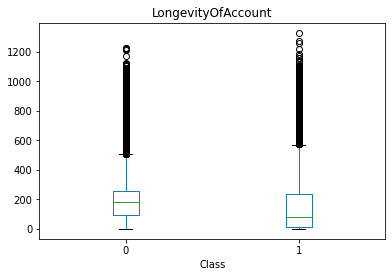

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


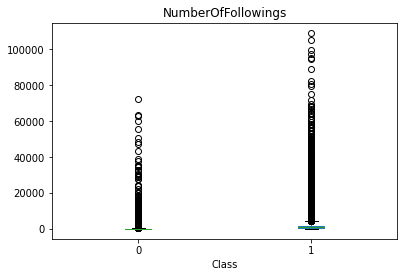

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


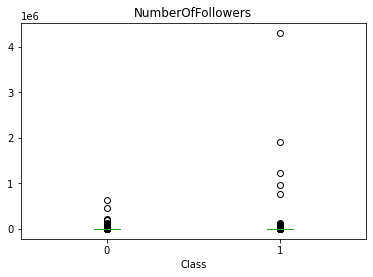

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


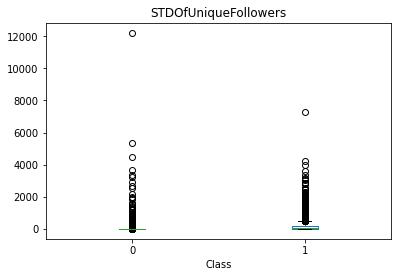

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


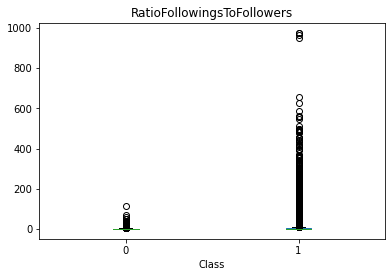

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


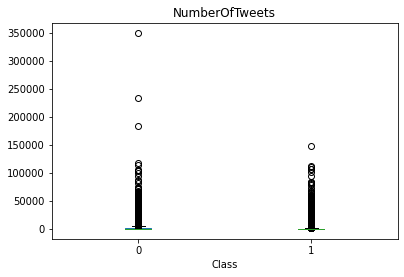

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


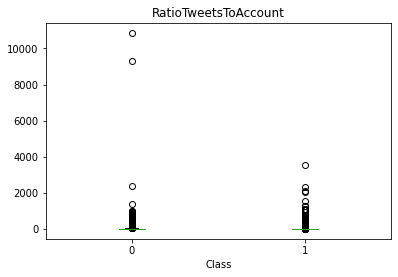

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


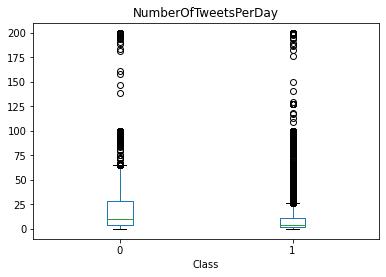

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


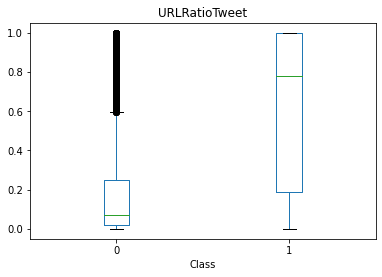

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


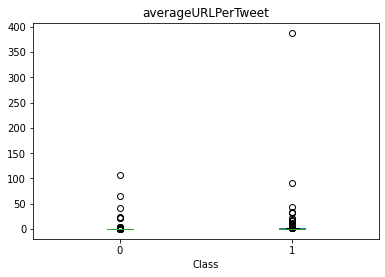

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


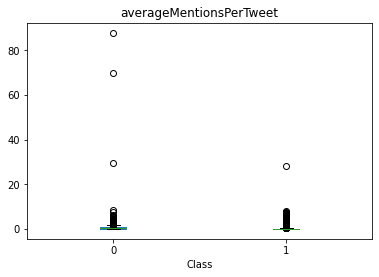

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


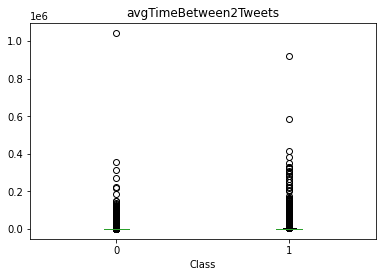

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


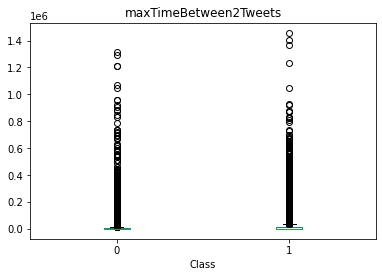

In [ ]:
# Construction d'un boite à moustache (Box plot) par attribut
# Cette boite à moustache compare à chaque fois les enregistrements des 2 classes
for column in dataSet_noMissingValues.columns:
    if column == 'Class':
        continue
    dataSet_noMissingValues.boxplot(column=column, by='Class', grid=False)
    plt.suptitle('')
    plt.savefig('/content/Pretreatment_Graphes/Boxplot_{}.png'.format(column))
    plt.show()
    del(column)

In [ ]:
#application de zscore pour normaliser les données
dataSet=zscores(dataSet_noMissingValues)
#display(dataSet)

### Extraction de trainig set

In [ ]:
exportCSV = dataSet_noMissingValues.to_csv (r'dataSet.csv', header=True)

## Tâche 1 : analyse comparative en utilisant tous les features

###Préparation des données de test et d'entrainement



In [ ]:
data=dataSet.drop(['Class'],axis=1)
data=data.values
labels=dataSet["Class"].values
train_features, test_features, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (29049, 15)
Training Labels Shape: (29049,)
Testing Features Shape: (12450, 15)
Testing Labels Shape: (12450,)


### Arbre de décision

F-mesure:  [0.91047717 0.92099493]
Surface sous la courbe ROC: 0.9157
Accuracy Score =  0.9160642570281124


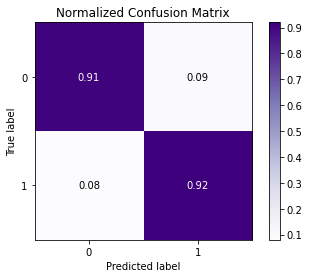

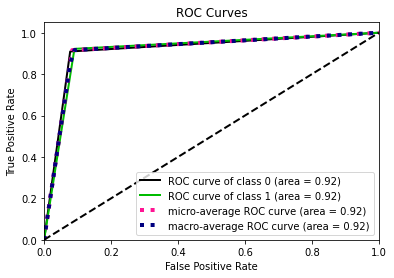

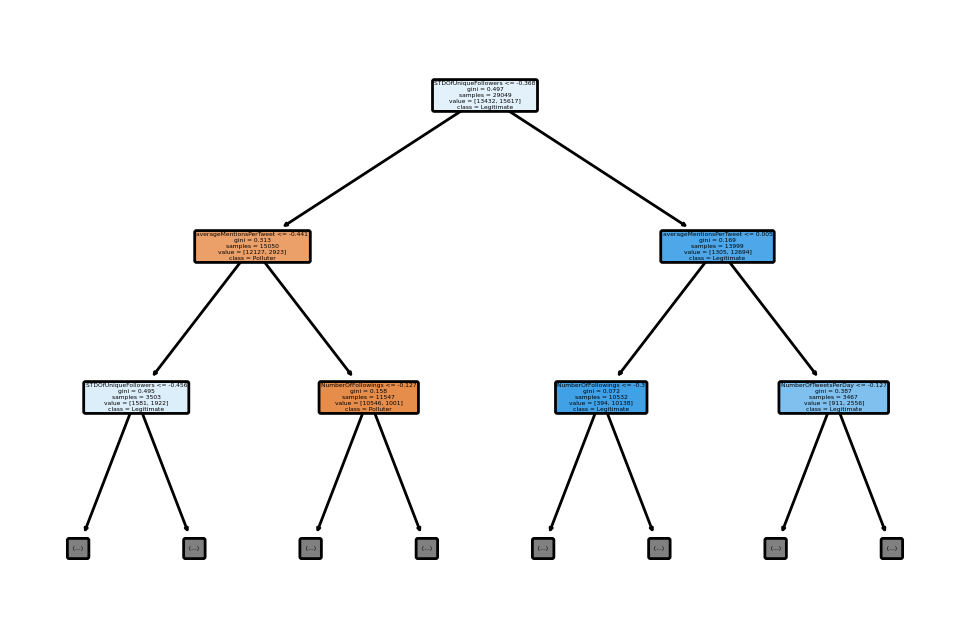

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=0)
decisionTree.fit(train_features, train_labels)
predicted_labels_AD = decisionTree.predict(test_features)
probasAD = decisionTree.predict_proba(test_features)

fmeasureAD = f1_score(test_labels, predicted_labels_AD, average=None)
fprAD, tprAD, thresholdsAD = roc_curve(test_labels, predicted_labels_AD)
rocAD = metrics.auc(fprAD, tprAD)

print("F-mesure: " ,fmeasureAD) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocAD) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_AD)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_AD, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache1_Graphes/Decision_Tree_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasAD)
plt.savefig('/content/Tache1_Graphes/Decision_Tree_ROC.png')

#Affichage de l'arbre associé au premier modèle d_tree1
plt.figure(dpi = 200)
tree.plot_tree(decisionTree,filled=True,
               feature_names=dataSet.keys().tolist(),
               class_names=['Polluter','Legitimate'],
               max_depth=2,
               rounded=True)
plt.savefig('/content/Tache1_Graphes/Decision_Tree_Graphe.png')
plt.show()

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_AD, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.91      0.91      0.91      5844
    Poluters       0.92      0.92      0.92      6606

    accuracy                           0.92     12450
   macro avg       0.92      0.92      0.92     12450
weighted avg       0.92      0.92      0.92     12450



In [ ]:
# Matrice de confusion pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_AD)

array([[[6091,  515],
        [ 530, 5314]],

       [[5314,  530],
        [ 515, 6091]]])

### Random Forest

F-mesure:  [0.94168541 0.94948284]
Surface sous la courbe ROC: 0.9450
Accuracy Score =  0.945863453815261


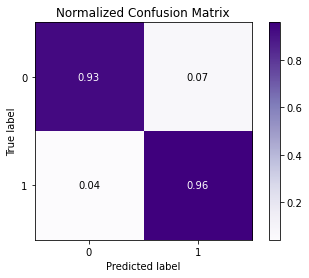

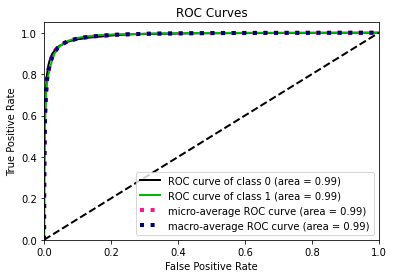

In [ ]:
randomForest = RandomForestClassifier(n_estimators=100,criterion="entropy")
randomForest.fit(train_features,train_labels)
predicted_labels_RF = randomForest.predict(test_features)
probasRF = randomForest.predict_proba(test_features)

fmeasureRF = f1_score(test_labels, predicted_labels_RF, average=None)
fprRF, tprRF, thresholdsRF = roc_curve(test_labels, predicted_labels_RF)
rocRF = metrics.auc(fprRF, tprRF)

print("F-mesure: " ,fmeasureRF) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocRF) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_RF)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_RF, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache1_Graphes/Random_Forest_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasRF)
plt.savefig('/content/Tache1_Graphes/Random_Forest_ROC.png')




In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_RF, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.95      0.93      0.94      5844
    Poluters       0.94      0.96      0.95      6606

    accuracy                           0.95     12450
   macro avg       0.95      0.95      0.95     12450
weighted avg       0.95      0.95      0.95     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_RF)

array([[[6334,  272],
        [ 402, 5442]],

       [[5442,  402],
        [ 272, 6334]]])

### Classification bayésienne naïve

F-mesure:  [0.737772   0.57527617]
Surface sous la courbe ROC: 0.6928
Accuracy Score =  0.6757429718875502


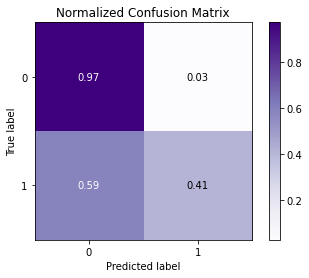

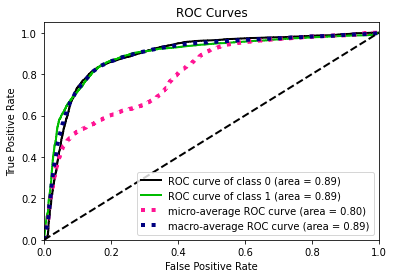

In [ ]:
gnb = GaussianNB()
gnb.fit(train_features, train_labels)
predicted_labels_NB = gnb.predict(test_features)
probasNB = gnb.predict_proba(test_features)


fmeasureNB = f1_score(test_labels, predicted_labels_NB, average=None)
fprNB, tprNB, thresholdsNB = roc_curve(test_labels, predicted_labels_NB)
rocNB = metrics.auc(fprNB, tprNB)

print("F-mesure: " ,fmeasureNB) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocNB) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_NB)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_NB, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache1_Graphes/Gaussian_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasNB)
plt.savefig('/content/Tache1_Graphes/Gaussian_Roc.png')




In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_NB, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.59      0.97      0.74      5844
    Poluters       0.94      0.41      0.58      6606

    accuracy                           0.68     12450
   macro avg       0.77      0.69      0.66     12450
weighted avg       0.78      0.68      0.65     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_NB)

array([[[2734, 3872],
        [ 165, 5679]],

       [[5679,  165],
        [3872, 2734]]])

### Bagging

F-mesure:  [0.93647382 0.94429788]
Surface sous la courbe ROC: 0.9401
Accuracy Score =  0.9406425702811245


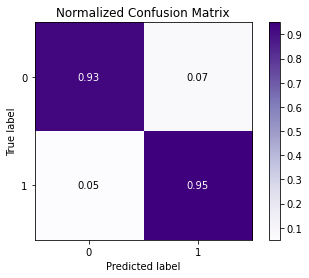

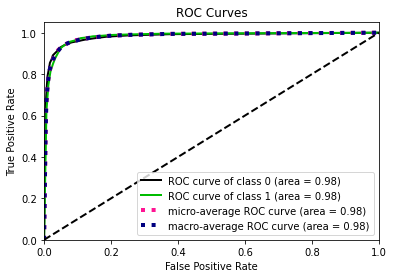

In [ ]:
bagging = BaggingClassifier( n_estimators=20, random_state=42) # by default it uses decision tree
bagging.fit(train_features,train_labels)
predicted_labels_BG = bagging.predict(test_features)
probasBG = bagging.predict_proba(test_features)

fmeasureBG = f1_score(test_labels, predicted_labels_BG, average=None)
fprBG, tprBG, thresholdsBG = roc_curve(test_labels, predicted_labels_BG)
rocBG = metrics.auc(fprBG, tprBG)

print("F-mesure: " ,fmeasureBG) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocBG) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_BG)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_BG, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache1_Graphes/Bagging_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasBG)
plt.savefig('/content/Tache1_Graphes/Bagging_ROC.png')




In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_BG, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.94      0.93      0.94      5844
    Poluters       0.94      0.95      0.94      6606

    accuracy                           0.94     12450
   macro avg       0.94      0.94      0.94     12450
weighted avg       0.94      0.94      0.94     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_BG)

array([[[6264,  342],
        [ 397, 5447]],

       [[5447,  397],
        [ 342, 6264]]])

### AdaBoost

F-mesure:  [0.91620303 0.92592873]
Surface sous la courbe ROC: 0.9210
Accuracy Score =  0.9213654618473895


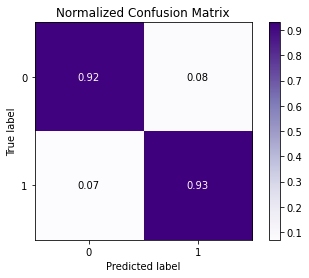

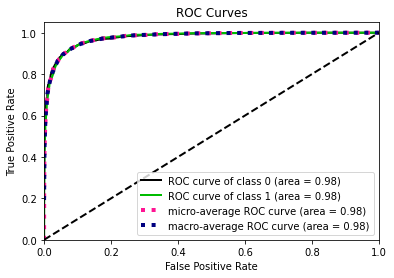

In [ ]:
adaBoost = AdaBoostClassifier( n_estimators=20, random_state=42) # by default it uses decision tree
adaBoost.fit(train_features,train_labels)
predicted_labels_AB = adaBoost.predict(test_features)
probasAB = adaBoost.predict_proba(test_features)

fmeasureAB = f1_score(test_labels, predicted_labels_AB, average=None)
fprAB, tprAB, thresholdsAB = roc_curve(test_labels, predicted_labels_AB)
rocAB = metrics.auc(fprAB, tprAB)

print("F-mesure: " ,fmeasureAB) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocAB) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_AB)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_AB, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache1_Graphes/ADABoost_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasAB)
plt.savefig('/content/Tache1_Graphes/ADABoost_ROC.png')




In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_AB, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.92      0.92      0.92      5844
    Poluters       0.93      0.93      0.93      6606

    accuracy                           0.92     12450
   macro avg       0.92      0.92      0.92     12450
weighted avg       0.92      0.92      0.92     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_AB)

array([[[6119,  487],
        [ 492, 5352]],

       [[5352,  492],
        [ 487, 6119]]])

### Analyse

> test

## Tâche 2 : analyse comparative avec sélection d’attributs

### Gain d’information (information gain)



['STDOfUniqueFollowers', 'NumberOfFollowings', 'RatioFollowingsToFollowers', 'averageMentionsPerTweet', 'NumberOfTweets', 'URLRatioTweet', 'averageURLPerTweet']


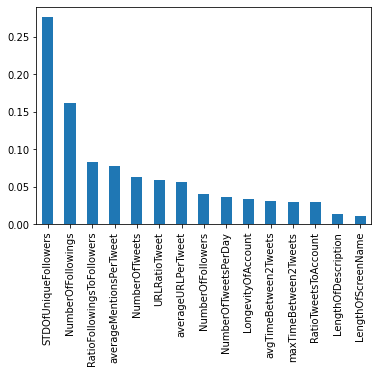

In [ ]:
dic = {}
for name, score in zip(dataSet.columns, randomForest.feature_importances_):
    dic[name] = score
iG = pd.Series(dic)
iG.sort_values(ascending = False , inplace = True)
iG.plot.bar()
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/feature_importance_GainInformation.png')
top7iG_features = iG[0:7].keys().tolist()
print(top7iG_features)


#### Implementation pour les 7 features plus importants

######Préparation des données de test et d'entrainement



In [ ]:
data_IG = dataSet.drop(['Class'],axis=1)
iG_features = [x for x in data_IG.keys().tolist() if x not in top7iG_features]
data_IG = data_IG.drop(iG_features,axis=1)
print(data_IG.shape)
data_IG=data_IG.values
labels=dataSet["Class"].values
train_features, test_features, train_labels, test_labels = train_test_split(data_IG, labels, test_size=0.3, random_state=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


(41499, 7)
Training Features Shape: (29049, 7)
Training Labels Shape: (29049,)
Testing Features Shape: (12450, 7)
Testing Labels Shape: (12450,)


###### Arbre de décision

F-mesure:  [0.90456931 0.91648468]
Surface sous la courbe ROC: 0.9103
Accuracy Score =  0.9109236947791165


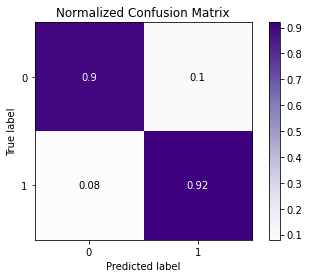

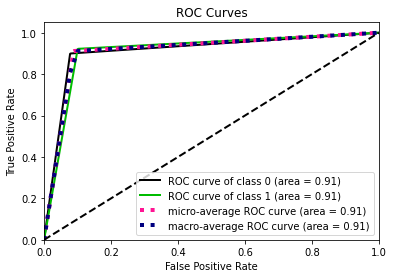

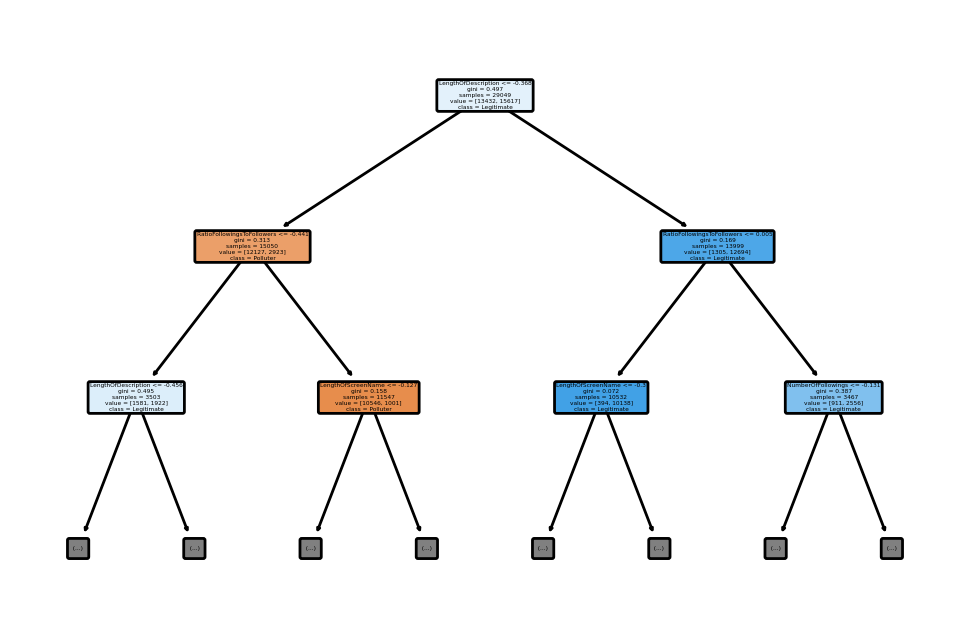

In [ ]:
decisionTree_IG = DecisionTreeClassifier(random_state=0)
decisionTree_IG.fit(train_features, train_labels)
predicted_labels_AD = decisionTree_IG.predict(test_features)
probasAD = decisionTree_IG.predict_proba(test_features)

fmeasureAD = f1_score(test_labels, predicted_labels_AD, average=None)
fprAD, tprAD, thresholdsAD = roc_curve(test_labels, predicted_labels_AD)
rocAD = metrics.auc(fprAD, tprAD)

print("F-mesure: " ,fmeasureAD) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocAD) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_AD)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_AD, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Decision_Tree_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasAD)
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Decision_Tree_Confusion_ROC.png')

#Affichage de l'arbre associé au premier modèle d_tree1
plt.figure(dpi = 200)
tree.plot_tree(decisionTree_IG,filled=True,
               feature_names=dataSet.keys().tolist(),
               class_names=['Polluter','Legitimate'],
               max_depth=2,
               rounded=True)
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Decision_Tree_Graphe.png')
plt.show()

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_AD, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.91      0.90      0.90      5844
    Poluters       0.91      0.92      0.92      6606

    accuracy                           0.91     12450
   macro avg       0.91      0.91      0.91     12450
weighted avg       0.91      0.91      0.91     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_AD)

array([[[6085,  521],
        [ 588, 5256]],

       [[5256,  588],
        [ 521, 6085]]])

###### Random Forest

F-mesure:  [0.93579884 0.94424852]
Surface sous la courbe ROC: 0.9395
Accuracy Score =  0.9403212851405622


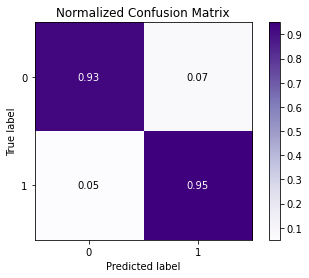

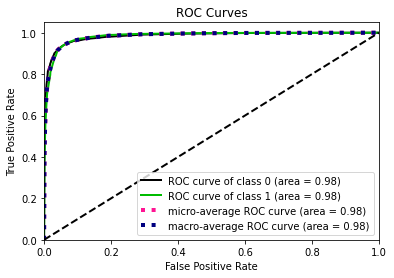

In [ ]:
randomForest = RandomForestClassifier(n_estimators=100,criterion="entropy")
randomForest.fit(train_features,train_labels)
predicted_labels_RF = randomForest.predict(test_features)
probasRF = randomForest.predict_proba(test_features)

fmeasureRF = f1_score(test_labels, predicted_labels_RF, average=None)
fprRF, tprRF, thresholdsRF = roc_curve(test_labels, predicted_labels_RF)
rocRF = metrics.auc(fprRF, tprRF)

print("F-mesure: " ,fmeasureRF) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocRF) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_RF)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_RF, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Random_Forest_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasRF)
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Random_Forest_ROC.png')




In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_RF, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.95      0.93      0.94      5844
    Poluters       0.94      0.95      0.94      6606

    accuracy                           0.94     12450
   macro avg       0.94      0.94      0.94     12450
weighted avg       0.94      0.94      0.94     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_RF)

array([[[6292,  314],
        [ 429, 5415]],

       [[5415,  429],
        [ 314, 6292]]])

###### Classification bayésienne naïve

F-mesure:  [0.7497203  0.60814013]
Surface sous la courbe ROC: 0.7107
Accuracy Score =  0.6945381526104417


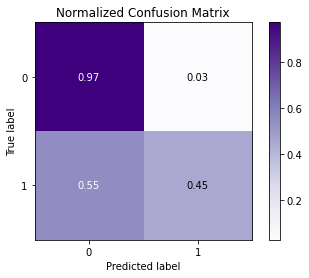

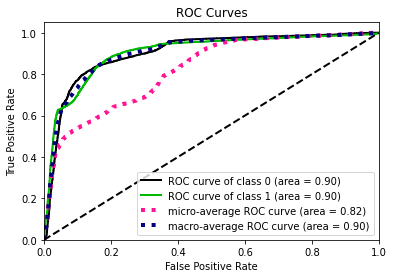

In [ ]:
gnb = GaussianNB()
gnb.fit(train_features, train_labels)
predicted_labels_NB = gnb.predict(test_features)
probasNB = gnb.predict_proba(test_features)


fmeasureNB = f1_score(test_labels, predicted_labels_NB, average=None)
fprNB, tprNB, thresholdsNB = roc_curve(test_labels, predicted_labels_NB)
rocNB = metrics.auc(fprNB, tprNB)

print("F-mesure: " ,fmeasureNB) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocNB) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_NB)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_NB, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Gaussian_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasNB)
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Gaussian_ROC.png')

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_NB, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.61      0.97      0.75      5844
    Poluters       0.95      0.45      0.61      6606

    accuracy                           0.69     12450
   macro avg       0.78      0.71      0.68     12450
weighted avg       0.79      0.69      0.67     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_NB)

array([[[2951, 3655],
        [ 148, 5696]],

       [[5696,  148],
        [3655, 2951]]])

###### Bagging

F-mesure:  [0.93167916 0.94034454]
Surface sous la courbe ROC: 0.9357
Accuracy Score =  0.9363052208835342


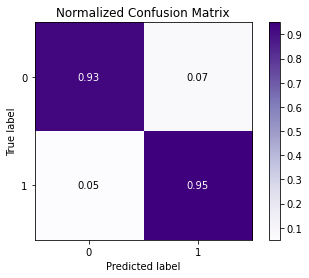

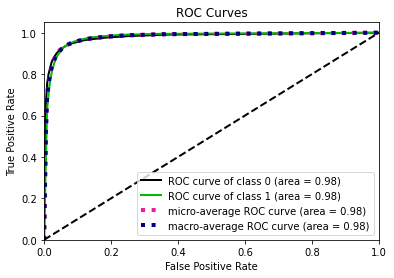

In [ ]:
bagging = BaggingClassifier( n_estimators=20, random_state=42) # by default it uses decision tree
bagging.fit(train_features,train_labels)
predicted_labels_BG = bagging.predict(test_features)
probasBG = bagging.predict_proba(test_features)

fmeasureBG = f1_score(test_labels, predicted_labels_BG, average=None)
fprBG, tprBG, thresholdsBG = roc_curve(test_labels, predicted_labels_BG)
rocBG = metrics.auc(fprBG, tprBG)

print("F-mesure: " ,fmeasureBG) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocBG) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_BG)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_BG, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Bagging_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasBG)
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/Bagging_ROC.png')

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_BG, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.94      0.93      0.93      5844
    Poluters       0.93      0.95      0.94      6606

    accuracy                           0.94     12450
   macro avg       0.94      0.94      0.94     12450
weighted avg       0.94      0.94      0.94     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_BG)

array([[[6250,  356],
        [ 437, 5407]],

       [[5407,  437],
        [ 356, 6250]]])

###### AdaBoost

F-mesure:  [0.91494058 0.92362805]
Surface sous la courbe ROC: 0.9197
Accuracy Score =  0.9195180722891566


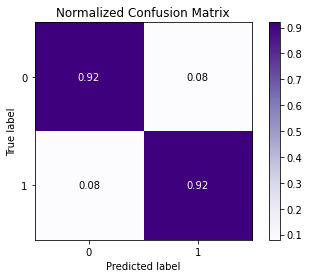

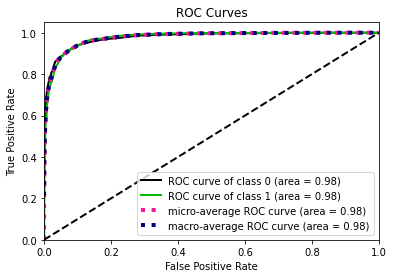

In [ ]:
adaBoost = AdaBoostClassifier( n_estimators=20, random_state=42) # by default it uses decision tree
adaBoost.fit(train_features,train_labels)
predicted_labels_AB = adaBoost.predict(test_features)
probasAB = adaBoost.predict_proba(test_features)

fmeasureAB = f1_score(test_labels, predicted_labels_AB, average=None)
fprAB, tprAB, thresholdsAB = roc_curve(test_labels, predicted_labels_AB)
rocAB = metrics.auc(fprAB, tprAB)

print("F-mesure: " ,fmeasureAB) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocAB) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_AB)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_AB, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/ADABoost_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasAB)
plt.savefig('/content/Tache2_Graphes/information_gain_Graphes/ADABoost_ROC.png')

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_AB, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.91      0.92      0.91      5844
    Poluters       0.93      0.92      0.92      6606

    accuracy                           0.92     12450
   macro avg       0.92      0.92      0.92     12450
weighted avg       0.92      0.92      0.92     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_AB)

array([[[6059,  547],
        [ 455, 5389]],

       [[5389,  455],
        [ 547, 6059]]])

###### Analyse

> test

### Test Chi-2 (Chi Squared)

['maxTimeBetween2Tweets', 'NumberOfFollowings', 'NumberOfFollowers', 'NumberOfTweets', 'avgTimeBetween2Tweets', 'STDOfUniqueFollowers', 'LongevityOfAccount']


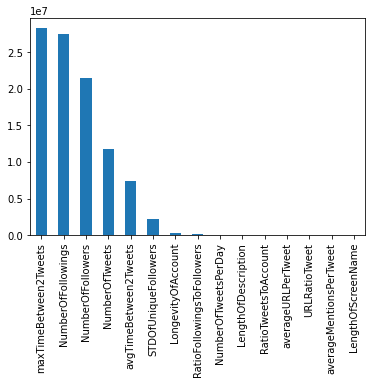

In [ ]:
X = dataSet_noMissingValues.drop('Class',axis=1)
y = dataSet_noMissingValues['Class']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[0],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/feature_importance_chi2.png')
top7Chi_features = p_values[:7].keys().tolist()
print(p_values[:7].keys().tolist())

#### Implementation pour les 7 features plus importants

######Préparation des données de test et d'entrainement



In [ ]:
data_Chi = dataSet.drop(['Class'],axis=1)
Chi_features = [x for x in data_Chi.keys().tolist() if x not in top7Chi_features]
data_Chi = data_Chi.drop(Chi_features,axis=1)
print(data_Chi.shape)
display(data_Chi)
data_Chi=data_Chi.values
labels=dataSet["Class"].values
train_features, test_features, train_labels, test_labels = train_test_split(data_Chi, labels, test_size=0.3, random_state=1)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

(41499, 7)


,LongevityOfAccount,NumberOfFollowings,NumberOfFollowers,STDOfUniqueFollowers,NumberOfTweets,avgTimeBetween2Tweets,maxTimeBetween2Tweets
UserID,,,,,,,
614,5.518022,-0.195712,-0.044870,-0.423327,0.272296,-0.138864,-0.304016
1038,5.481995,-0.244462,-0.041211,-0.441370,0.484518,-0.142275,-0.309018
...,...,...,...,...,...,...,...
173723395,-0.969343,-0.308121,-0.058482,-0.149261,-0.332350,-0.152766,-0.328996
173766965,-0.969671,-0.313564,-0.058639,-0.453128,-0.335329,-0.153356,-0.329782


Training Features Shape: (29049, 7)
Training Labels Shape: (29049,)
Testing Features Shape: (12450, 7)
Testing Labels Shape: (12450,)


###### Arbre de décision

F-mesure:  [0.89069728 0.90352336]
Surface sous la courbe ROC: 0.8971
Accuracy Score =  0.8975100401606426


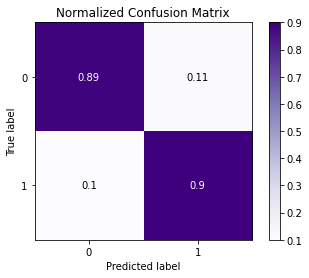

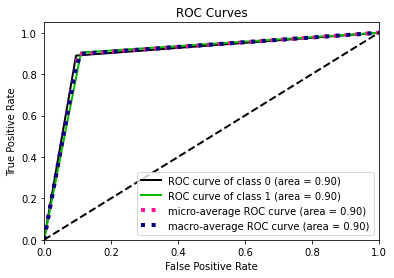

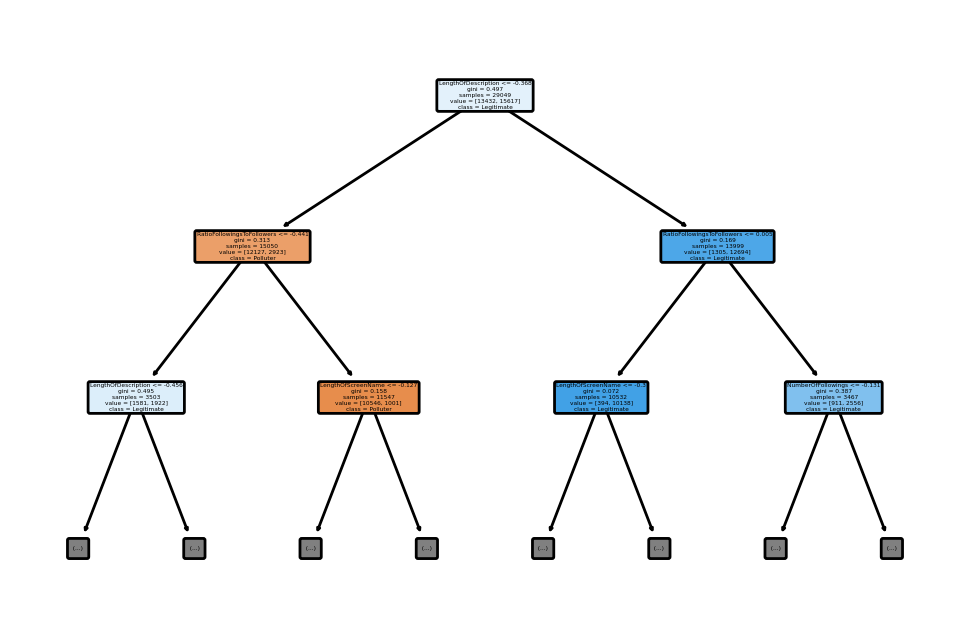

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=0)
decisionTree.fit(train_features, train_labels)
predicted_labels_AD = decisionTree.predict(test_features)
probasAD = decisionTree.predict_proba(test_features)

fmeasureAD = f1_score(test_labels, predicted_labels_AD, average=None)
fprAD, tprAD, thresholdsAD = roc_curve(test_labels, predicted_labels_AD)
rocAD = metrics.auc(fprAD, tprAD)

print("F-mesure: " ,fmeasureAD) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocAD) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_AD)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_AD, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Decision_Tree_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasAD)
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Decision_Tree_ROC.png')

#Affichage de l'arbre associé au premier modèle d_tree1
plt.figure(dpi = 200)
tree.plot_tree(decisionTree_IG,filled=True,
               feature_names=dataSet.keys().tolist(),
               class_names=['Polluter','Legitimate'],
               max_depth=2,
               rounded=True)
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Decision_Tree_Graphe.png')
plt.show()

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_AD, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.89      0.89      0.89      5844
    Poluters       0.90      0.90      0.90      6606

    accuracy                           0.90     12450
   macro avg       0.90      0.90      0.90     12450
weighted avg       0.90      0.90      0.90     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_AD)

array([[[5975,  631],
        [ 645, 5199]],

       [[5199,  645],
        [ 631, 5975]]])

###### Random Forest

F-mesure:  [0.92793648 0.93727935]
Surface sous la courbe ROC: 0.9322
Accuracy Score =  0.9329317269076305


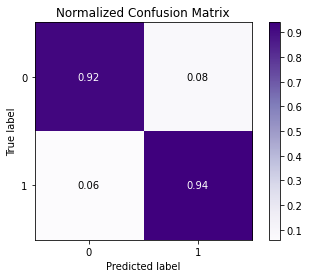

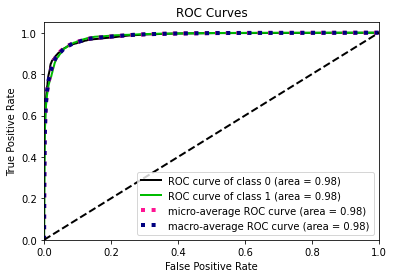

In [ ]:
randomForest = RandomForestClassifier(n_estimators=100,criterion="entropy")
randomForest.fit(train_features,train_labels)
predicted_labels_RF = randomForest.predict(test_features)
probasRF = randomForest.predict_proba(test_features)

fmeasureRF = f1_score(test_labels, predicted_labels_RF, average=None)
fprRF, tprRF, thresholdsRF = roc_curve(test_labels, predicted_labels_RF)
rocRF = metrics.auc(fprRF, tprRF)

print("F-mesure: " ,fmeasureRF) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocRF) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_RF)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_RF, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Random_Forest_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasRF)
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Random_Forest_ROC.png')

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_RF, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.94      0.92      0.93      5844
    Poluters       0.93      0.94      0.94      6606

    accuracy                           0.93     12450
   macro avg       0.93      0.93      0.93     12450
weighted avg       0.93      0.93      0.93     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_RF)

array([[[6239,  367],
        [ 468, 5376]],

       [[5376,  468],
        [ 367, 6239]]])

###### Classification bayésienne naïve

F-mesure:  [0.69488944 0.40952493]
Surface sous la courbe ROC: 0.6195
Accuracy Score =  0.5976706827309237


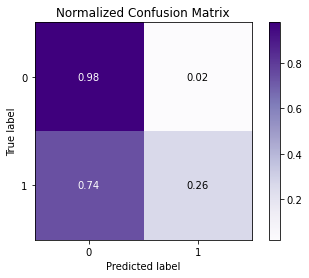

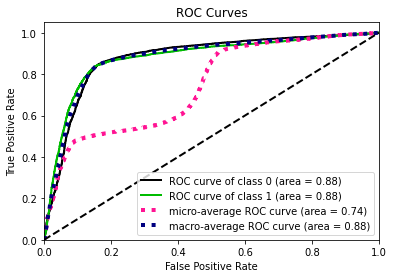

In [ ]:
gnb = GaussianNB()
gnb.fit(train_features, train_labels)
predicted_labels_NB = gnb.predict(test_features)
probasNB = gnb.predict_proba(test_features)

fmeasureNB = f1_score(test_labels, predicted_labels_NB, average=None)
fprNB, tprNB, thresholdsNB = roc_curve(test_labels, predicted_labels_NB)
rocNB = metrics.auc(fprNB, tprNB)

print("F-mesure: " ,fmeasureNB) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocNB) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_NB)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_NB, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Guassian_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasNB)
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Guassian_Confusion_ROC.png')

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_NB, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.54      0.98      0.69      5844
    Poluters       0.93      0.26      0.41      6606

    accuracy                           0.60     12450
   macro avg       0.73      0.62      0.55     12450
weighted avg       0.74      0.60      0.54     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_NB)

array([[[1737, 4869],
        [ 140, 5704]],

       [[5704,  140],
        [4869, 1737]]])

###### Bagging

F-mesure:  [0.92361826 0.93282005]
Surface sous la courbe ROC: 0.9281
Accuracy Score =  0.9285140562248996


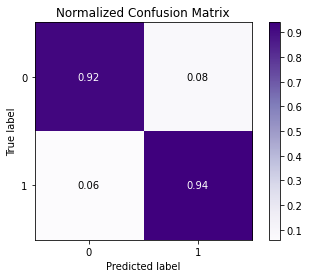

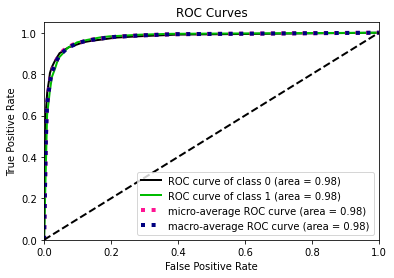

In [ ]:
bagging = BaggingClassifier( n_estimators=20, random_state=42) # by default it uses decision tree
bagging.fit(train_features,train_labels)
predicted_labels_BG = bagging.predict(test_features)
probasBG = bagging.predict_proba(test_features)

fmeasureBG = f1_score(test_labels, predicted_labels_BG, average=None)
fprBG, tprBG, thresholdsBG = roc_curve(test_labels, predicted_labels_BG)
rocBG = metrics.auc(fprBG, tprBG)

print("F-mesure: " ,fmeasureBG) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocBG) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_BG)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_BG, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Bagging_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasBG)
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/Bagging_ROC.png')

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_BG, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.93      0.92      0.92      5844
    Poluters       0.93      0.94      0.93      6606

    accuracy                           0.93     12450
   macro avg       0.93      0.93      0.93     12450
weighted avg       0.93      0.93      0.93     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_BG)

array([[[6179,  427],
        [ 463, 5381]],

       [[5381,  463],
        [ 427, 6179]]])

###### AdaBoost

F-mesure:  [0.90899804 0.91872577]
Surface sous la courbe ROC: 0.9141
Accuracy Score =  0.9141365461847389


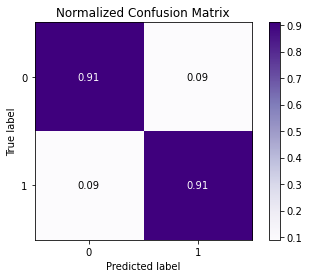

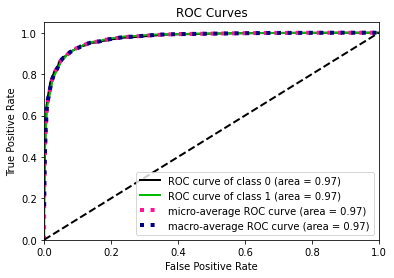

In [ ]:
adaBoost = AdaBoostClassifier( n_estimators=20, random_state=42) # by default it uses decision tree
adaBoost.fit(train_features,train_labels)
predicted_labels_AB = adaBoost.predict(test_features)
probasAB = adaBoost.predict_proba(test_features)

fmeasureAB = f1_score(test_labels, predicted_labels_AB, average=None)
fprAB, tprAB, thresholdsAB = roc_curve(test_labels, predicted_labels_AB)
rocAB = metrics.auc(fprAB, tprAB)

print("F-mesure: " ,fmeasureAB) #F-measure
print("Surface sous la courbe ROC: %0.4f" % rocAB) #ROC (AUC)
acc = accuracy_score(test_labels, predicted_labels_AB)
print("Accuracy Score = ", acc)

# Rprésentation graphique de la matrice de confusion
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels_AB, normalize=True,cmap = "Purples") # TP & FP Rates
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/ADABoost_Confusion_Matrix.png')
skplt.metrics.plot_roc(test_labels, probasAB)
plt.savefig('/content/Tache2_Graphes/Chi2_Graphes/ADABoost_ROC.png')

In [ ]:
# Affichage des résultats par classe
from sklearn.metrics import classification_report
target_names = ['Legitimates', 'Poluters']
print(classification_report(test_labels, predicted_labels_AB, target_names=target_names))

              precision    recall  f1-score   support

 Legitimates       0.90      0.91      0.91      5844
    Poluters       0.92      0.91      0.92      6606

    accuracy                           0.91     12450
   macro avg       0.91      0.91      0.91     12450
weighted avg       0.91      0.91      0.91     12450



In [ ]:
# Matrice de confision pour chaque classe
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels, predicted_labels_AB)

array([[[6042,  564],
        [ 505, 5339]],

       [[5339,  505],
        [ 564, 6042]]])

###### Analyse

> test